In [1]:
import os
import numpy as np
import pandas as pd
from Bio import SeqIO

halft5_dir = "/data/franco/datasets/prot_embedding_weights/half_prottrans_t5_xl_u50/"
prott5_dir = "/data/franco/datasets/prot_embedding_weights/prottrans_t5_xl_u50/"
esmb1_dir  = "/data/franco/datasets/prot_embedding_weights/"

embedding_data = {}
embedding_data['halft5'] = { 'dir': halft5_dir }
embedding_data['prott5'] = { 'dir': prott5_dir }
embedding_data['esmb1']  = { 'dir': esmb1_dir }

sel_embedding = 'halft5'


In [108]:
# load consensus sequences

disprot_consensus_file = "/data/franco/datasets/disprot/DisProt_release_2022_06_with_ambiguous_evidences_consensus_regions.fasta"

disprot_annot_dict = dict()
for record in SeqIO.parse(disprot_consensus_file, "fasta"):
    uniprotid = record.description.split("=")[1]
    disprot_annot_dict[uniprotid] = record.seq

In [29]:
sequences  = []
embeddings = []
fastadir = "/data/franco/datasets/disprot/fasta/"
fastafiles = os.listdir(fastadir)
for f in fastafiles[:100]:
    print(f)
    fastaname = f.split(".")[0]
    embed_file = os.path.join(sel_embedding, fastaname+".gz")
    print(embed_file)
    if os.path.exists(embed_file):
        e = np.loadtxt(embed_file)
        embeddings.append(e)
    else:
        ## skip this file
        print(f"skipped {embed_file}")
        continue
    
    nrec = 0
    for record in SeqIO.parse(os.path.join(fastadir, f), "fasta"):
        sequences.append(record)
        print(f"Loaded {f}")
        nrec += 1
        if nrec > 1:
            print("More than one record?", f)
            raise

Q8R426-2.fasta
halft5/Q8R426-2.gz
Loaded Q8R426-2.fasta
Q13740.fasta
halft5/Q13740.gz
Loaded Q13740.fasta
Q9CXW3.fasta
halft5/Q9CXW3.gz
Loaded Q9CXW3.fasta
O75807.fasta
halft5/O75807.gz
Loaded O75807.fasta
P02259.fasta
halft5/P02259.gz
Loaded P02259.fasta
P08523.fasta
halft5/P08523.gz
Loaded P08523.fasta
P77173.fasta
halft5/P77173.gz
Loaded P77173.fasta
Q9LQT8.fasta
halft5/Q9LQT8.gz
Loaded Q9LQT8.fasta
P53563.fasta
halft5/P53563.gz
Loaded P53563.fasta
Q9BYF1.fasta
halft5/Q9BYF1.gz
Loaded Q9BYF1.fasta
Q920Q2.fasta
halft5/Q920Q2.gz
Loaded Q920Q2.fasta
P02547.fasta
halft5/P02547.gz
Loaded P02547.fasta
Q15726.fasta
halft5/Q15726.gz
Loaded Q15726.fasta
Q91ZE9.fasta
halft5/Q91ZE9.gz
Loaded Q91ZE9.fasta
P59636.fasta
halft5/P59636.gz
Loaded P59636.fasta
P04183.fasta
halft5/P04183.gz
Loaded P04183.fasta
J7QA90.fasta
halft5/J7QA90.gz
Loaded J7QA90.fasta
Q12834.fasta
halft5/Q12834.gz
Loaded Q12834.fasta
Q9QWH1.fasta
halft5/Q9QWH1.gz
Loaded Q9QWH1.fasta
Q9VPU8.fasta
halft5/Q9VPU8.gz
Loaded Q9VPU8.

In [122]:
for i,s in enumerate(sequences):
    if s.name.split("|")[1] == "Q12983":
        print(i)

58


In [123]:
concat_emb = np.vstack(embeddings)

ss = [str(s.seq) for s in sequences]
concat_seq = [aa for seq in ss for aa in seq]

disseqs = list()
for s in sequences:
    uniprotid = s.description.split("|")[1]
    if len(s.seq) == len(disprot_annot_dict[uniprotid]):
        disseqs.append(disprot_annot_dict[uniprotid])
    else:
        print("Lengths do not match")
        print(s, disprot_annot_dict[uniprotid])
        print(len(s.seq), len(disprot_annot_dict[uniprotid]))
        disseqs.append(["-" for x in s.seq])

concat_dis = [dd for disseq in disseqs for dd in disseq]
print(len(concat_dis), len(concat_seq))

Lengths do not match
ID: sp|Q12983|BNIP3_HUMAN
Name: sp|Q12983|BNIP3_HUMAN
Description: sp|Q12983|BNIP3_HUMAN BCL2/adenovirus E1B 19 kDa protein-interacting protein 3 OS=Homo sapiens OX=9606 GN=BNIP3 PE=1 SV=4
Number of features: 0
Seq('MSQNGAPGMQEESLQGSWVELHFSNNGNGGSVPASVSIYNGDMEKILLDAQHES...STF') ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------DDDDDDDDDDDDD------------------------------------
194 259
40299 40299


In [31]:
from bio_embeddings.project import tsne_reduce
from bio_embeddings.visualize import render_3D_scatter_plotly

transformed_embeddings = tsne_reduce(concat_emb)

/home/franco/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 40299 samples in 0.055s...
[t-SNE] Computed neighbors for 40299 samples in 73.939s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40299
[t-SNE] Computed conditional probabilities for sample 2000 / 40299
[t-SNE] Computed conditional probabilities for sample 3000 / 40299
[t-SNE] Computed conditional probabilities for sample 4000 / 40299
[t-SNE] Computed conditional probabilities for sample 5000 / 40299
[t-SNE] Computed conditional probabilities for sample 6000 / 40299
[t-SNE] Computed conditional probabilities for sample 7000 / 40299
[t-SNE] Computed conditional probabilities for sample 8000 / 40299
[t-SNE] Computed conditional probabilities for sample 9000 / 40299
[t-SNE] Computed conditional probabilities for sample 10000 / 40299
[t-SNE] Computed conditional probabilities for sample 11000 / 40299
[t-SNE] Computed conditional probabilities for sample 12000 / 40299
[t-SNE] Computed conditional probabilities for sa

In [36]:
transformed_embeddings.shape

(40299, 3)

In [33]:
embeddings_dataframe = pd.DataFrame(transformed_embeddings, columns=["component_0", "component_1", "component_2"])
embeddings_dataframe['label'] = concat_seq

In [ ]:
# from bio_embeddings.visualize import render_scatter_plotly

# # fig = render_3D_scatter_plotly(embeddings_dataframe=embeddings_dataframe)
# fig = render_scatter_plotly(embeddings_dataframe=embeddings_dataframe)
# fig.show()

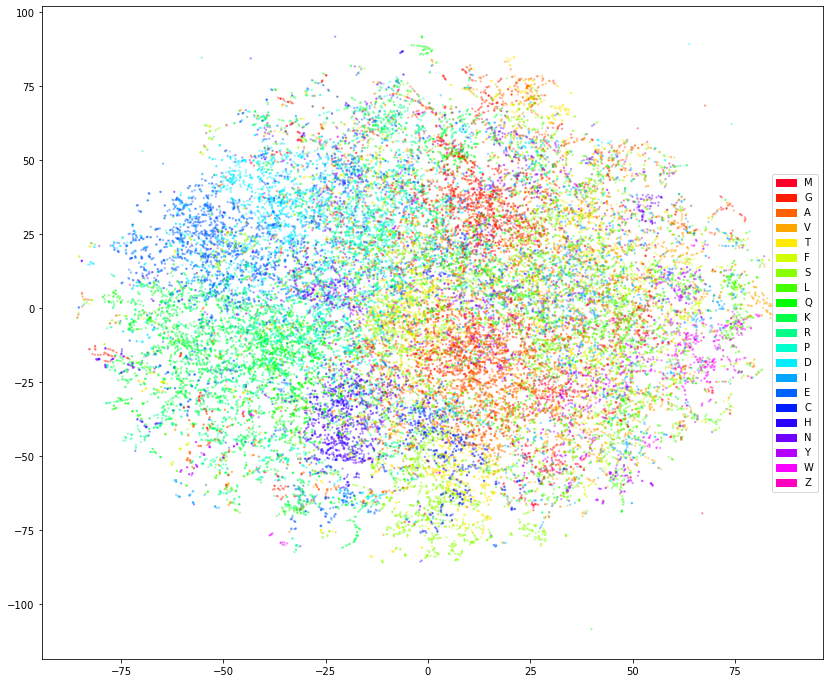

In [83]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch


AAs = list(embeddings_dataframe.label.unique())
cmap = cm.get_cmap('gist_rainbow', len(AAs))

colordict = dict(zip(AAs, np.arange(0, len(AAs))))

fig = plt.figure(figsize=(14,12))
ax  = fig.add_subplot(111)
ax.scatter(embeddings_dataframe["component_0"], embeddings_dataframe["component_1"], s=2, alpha=0.3, 
           c=[cmap(colordict[x]) for x in embeddings_dataframe.label])

legend_elements = [Patch(facecolor=cmap(colordict[x]), edgecolor=cmap(colordict[x]),label=x) for x in AAs]
ax.legend(handles=legend_elements, loc='right')
plt.show()

In [84]:
import umap

disprot_umap = umap.UMAP(n_neighbors=30, min_dist=.25)

embedding = disprot_umap.fit_transform(concat_emb)


In [87]:
embedding.shape

(40299, 2)

In [95]:
aa_means = dict()
for aa in AAs:
    AAix = [x for x in range(0, len(concat_seq)) if concat_seq[x] == aa]
    embed_aa = embedding[AAix,:]
    x_mean = np.mean(embed_aa[:,0])
    y_mean = np.mean(embed_aa[:,1])
    aa_means[aa] = (x_mean, y_mean)

In [96]:
aa_means

{'H': (-3.7968247, 1.2448387),
 'P': (5.97419, -5.4050837),
 'Y': (-3.555068, -4.311864),
 'L': (-1.2567979, -3.931695),
 'W': (-3.6676197, -2.9426503),
 'G': (-0.06404232, 0.55563223),
 'V': (-0.19993125, -3.5220299),
 'C': (3.5082264, -3.2620895),
 'N': (2.6089656, 2.6690178),
 'R': (-3.146723, 4.0378237),
 'M': (-1.5431079, -5.4071946),
 'Q': (-0.5178997, 3.7992792),
 'I': (-0.8197358, -3.4628885),
 'Z': (-0.20066458, -3.7833548),
 'D': (3.0366447, 4.796764),
 'F': (-2.3883395, -3.9361367),
 'E': (2.2891872, 5.807761),
 'A': (1.599148, -1.6979368),
 'K': (-1.2419018, 5.0561934),
 'T': (3.892775, 0.6821444),
 'S': (3.6734707, -0.15755194)}

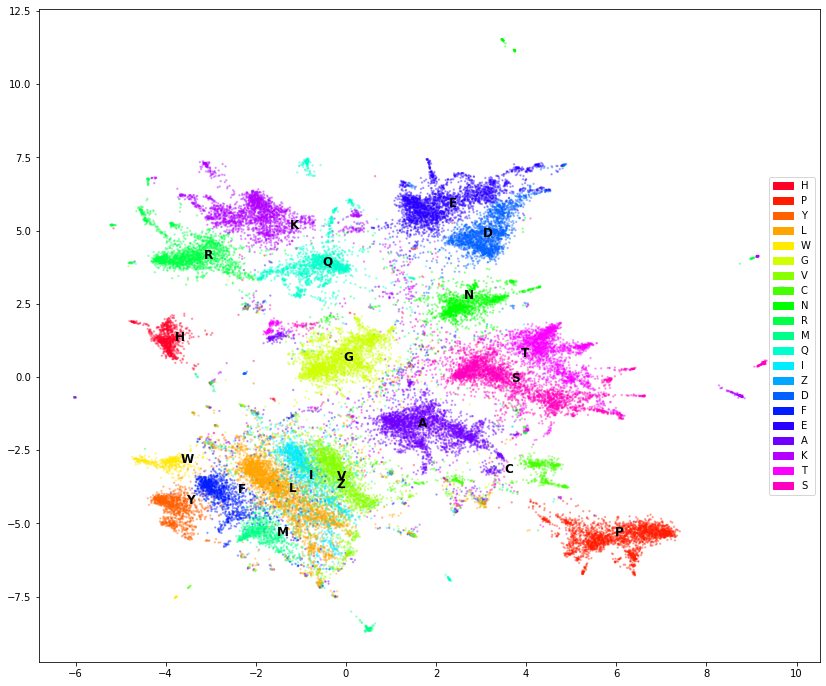

In [139]:
AAs = list(set(concat_seq))
cmap = cm.get_cmap('gist_rainbow', len(AAs))
colordict = dict(zip(AAs, np.arange(0, len(AAs))))

fig = plt.figure(figsize=(14,12))
ax  = fig.add_subplot(111)
ax.scatter(embedding[:,0], embedding[:,1], s=2, alpha=0.3, 
           c=[cmap(colordict[x]) for x in concat_seq])

for aa in aa_means.keys():
    ax.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')
    
legend_elements = [Patch(facecolor=cmap(colordict[x]), edgecolor=cmap(colordict[x]),label=x) for x in AAs]
ax.legend(handles=legend_elements, loc='right')
plt.show()

['-', 'D', 'F', 'T']


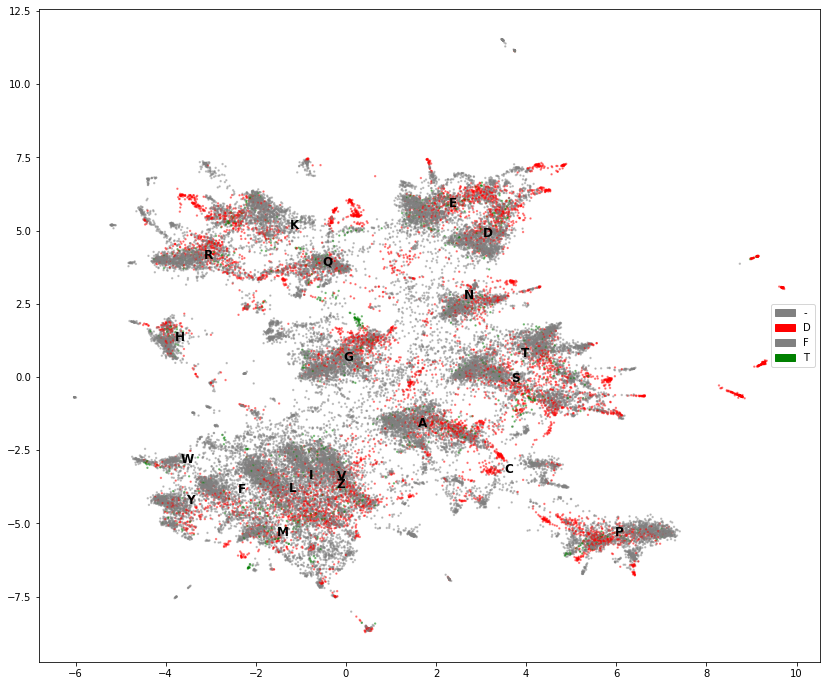

In [140]:
DDs = sorted(list(set(concat_dis)))
print(DDs)
colors = ["gray", "red", "gray", "green"]
colordict = dict(zip(DDs, colors))
# cmap = cm.get_cmap('Set1', 8)
# colordict = dict(zip(DDs, np.arange(0, len(DDs))))

fig = plt.figure(figsize=(14,12))
ax  = fig.add_subplot(111)
ax.scatter(embedding[:,0], embedding[:,1], s=2, alpha=0.4, 
           c=[colordict[x] for x in concat_dis])

for aa in aa_means.keys():
    ax.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')

legend_elements = [Patch(facecolor=colordict[x], edgecolor=colordict[x],label=x) for x in DDs]
ax.legend(handles=legend_elements, loc='right')
plt.show()